# BDT Benchmark Tests

### Variables being tested:

- Test size/Training size
    - test sizes: 0.4, 0.25, 0.6, 0.8
    - training sizes: 0.6, 0.75, 0.4, 0.2
- n estimators
    - 100, 1000, 500, 300
- learning rate
    - 1, 10, 5, 3, 2

### Initial code (without any changes)

- test size = 0.4
- training size = 0.6
- random state = 2
- n estimators = 100
- learning rate = 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

import pandas as pd

signal = pd.read_csv('.//data//300.csv', index_col=0)
background = pd.read_csv('.//data//background.csv', index_col=0)

signal.drop(["nTags", "MCChannelNumber", "mVHres"], axis=1, inplace=True)
background.drop(["nTags", "MCChannelNumber", "mVHres"], axis=1, inplace=True)

C:\Users\bmand\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
train_bkg, test_bkg = train_test_split(background, test_size=0.4, random_state=2)
train_signal, test_signal = train_test_split(signal, test_size=0.4, random_state=2)

train_y = len(train_bkg) * [0] + len(train_signal) * [1]
test_y = len(test_bkg) * [0] + len(test_signal) * [1]

train_x = pd.concat([train_bkg, train_signal], ignore_index=True)
test_x = pd.concat([test_bkg, test_signal], ignore_index=True)

train_x.drop(["weight"], axis=1, inplace=True)
test_x.drop(["weight"], axis=1, inplace=True)


BDT_clf = AdaBoostClassifier(n_estimators=100).fit(train_x, train_y)
train_score = BDT_clf.score(train_x, train_y)
test_score  = BDT_clf.score(test_x, test_y)

print("Decision Tree Classifier Score is:")
print("\tTrain Score = ", train_score)
print("\tTest Score  = {:5.4f}".format(test_score))
print("\tNumber of mis-classified test data = {:2.1f}".format((1-test_score)*len(test_x)))

Decision Tree Classifier Score is:
	Train Score =  0.9059502401713917
	Test Score  = 0.9060
	Number of mis-classified test data = 25866.0



Study the test data

confusion matrix (test) = 
 [[249072    108]
 [ 25758    144]]


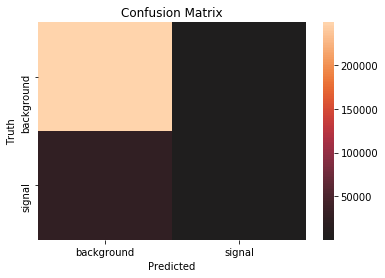


Check ground truth against predictions for the test sample
Truth	Prediction	Correct Prediction

Run Cross Validation On the Sample
cross validation scores =  [0.90596789 0.9059073  0.90617275 0.90584557 0.90589404]
	mean = 0.9060


In [9]:
print("\n\033[1mStudy the test data\033[0m")

predictions = BDT_clf.predict(test_x)
BDTcm = confusion_matrix(test_y, predictions)
print("\nconfusion matrix (test) = \n", BDTcm)

ax= plt.subplot()
sns.heatmap(BDTcm, center=True, ax = ax)
ax.set_xlabel('Predicted');ax.set_ylabel('Truth'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['background', 'signal']); ax.yaxis.set_ticklabels(['background', 'signal']);
plt.show()

print("\n\033[1mCheck ground truth against predictions for the test sample\033[0m")
print("Truth\tPrediction\tCorrect Prediction")
for i in range(len(predictions)):
    Match = False
    if predictions[i] == test_y[i]:
        Match = True

print("\n\033[1mRun Cross Validation On the Sample\033[0m")
scores = cross_val_score(BDT_clf, train_x, train_y, cv=5)
print("cross validation scores = ", scores)
print("\tmean = {:5.4f}".format(scores.mean()))

This initial setup was quite bad as it misclassified most of the signals

## Test size/Training size

### test_size = 0.25, training_size = 0.75

In [33]:
train_bkg, test_bkg = train_test_split(background, test_size=0.25, random_state=2)
train_signal, test_signal = train_test_split(signal, test_size=0.25, random_state=2)

train_y = len(train_bkg) * [0] + len(train_signal) * [1]
test_y = len(test_bkg) * [0] + len(test_signal) * [1]

train_x = pd.concat([train_bkg, train_signal], ignore_index=True)
test_x = pd.concat([test_bkg, test_signal], ignore_index=True)

train_x.drop(["weight"], axis=1, inplace=True)
test_x.drop(["weight"], axis=1, inplace=True)


BDT_clf = AdaBoostClassifier(n_estimators=100).fit(train_x, train_y)
train_score = BDT_clf.score(train_x, train_y)
test_score  = BDT_clf.score(test_x, test_y)

print("Decision Tree Classifier Score is:")
print("\tTrain Score = ", train_score)
print("\tTest Score  = {:5.4f}".format(test_score))
print("\tNumber of mis-classified test data = {:2.1f}".format((1-test_score)*len(test_x)))

Decision Tree Classifier Score is:
	Train Score =  0.9059399701809115
	Test Score  = 0.9060
	Number of mis-classified test data = 16161.0


In [34]:
print("\n\033[1mStudy the test data\033[0m")

predictions = BDT_clf.predict(test_x)
BDTcm = confusion_matrix(test_y, predictions)
print("\nconfusion matrix (test) = \n", BDTcm)

ax= plt.subplot()
sns.heatmap(BDTcm, center=True, ax = ax)
ax.set_xlabel('Predicted');ax.set_ylabel('Truth'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['background', 'signal']); ax.yaxis.set_ticklabels(['background', 'signal']);
plt.show()

print("\n\033[1mCheck ground truth against predictions for the test sample\033[0m")
print("Truth\tPrediction\tCorrect Prediction")
for i in range(len(predictions)):
    Match = False
    if predictions[i] == test_y[i]:
        Match = True

print("\n\033[1mRun Cross Validation On the Sample\033[0m")
scores = cross_val_score(BDT_clf, train_x, train_y, cv=5)
print("cross validation scores = ", scores)
print("\tmean = {:5.4f}".format(scores.mean()))


Study the test data

confusion matrix (test) = 
 [[155695     43]
 [ 16118     71]]


C:\Users\bmand\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)



Check ground truth against predictions for the test sample
Truth	Prediction	Correct Prediction

Run Cross Validation On the Sample
cross validation scores =  [0.90593858 0.90603552 0.90582134 0.90589889 0.90591828]
	mean = 0.9059


The background classification was better than the intial setup, however the signal classification was even worse so this is quite bad.

### test_size = 0.6, training_size = 0.4

In [13]:
train_bkg, test_bkg = train_test_split(background, test_size=0.6, random_state=2)
train_signal, test_signal = train_test_split(signal, test_size=0.6, random_state=2)

train_y = len(train_bkg) * [0] + len(train_signal) * [1]
test_y = len(test_bkg) * [0] + len(test_signal) * [1]

train_x = pd.concat([train_bkg, train_signal], ignore_index=True)
test_x = pd.concat([test_bkg, test_signal], ignore_index=True)

train_x.drop(["weight"], axis=1, inplace=True)
test_x.drop(["weight"], axis=1, inplace=True)


BDT_clf = AdaBoostClassifier(n_estimators=100).fit(train_x, train_y)
train_score = BDT_clf.score(train_x, train_y)
test_score  = BDT_clf.score(test_x, test_y)

print("Decision Tree Classifier Score is:")
print("\tTrain Score = ", train_score)
print("\tTest Score  = {:5.4f}".format(test_score))
print("\tNumber of mis-classified test data = {:2.1f}".format((1-test_score)*len(test_x)))

Decision Tree Classifier Score is:
	Train Score =  0.9059804203125624
	Test Score  = 0.9060
	Number of mis-classified test data = 38807.0



Study the test data

confusion matrix (test) = 
 [[373595    175]
 [ 38632    221]]


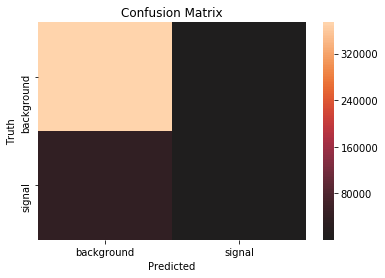


Check ground truth against predictions for the test sample
Truth	Prediction	Correct Prediction

Run Cross Validation On the Sample
cross validation scores =  [0.90584728 0.90608187 0.9058274  0.90575469 0.90573651]
	mean = 0.9058


In [14]:
print("\n\033[1mStudy the test data\033[0m")

predictions = BDT_clf.predict(test_x)
BDTcm = confusion_matrix(test_y, predictions)
print("\nconfusion matrix (test) = \n", BDTcm)

ax= plt.subplot()
sns.heatmap(BDTcm, center=True, ax = ax)
ax.set_xlabel('Predicted');ax.set_ylabel('Truth'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['background', 'signal']); ax.yaxis.set_ticklabels(['background', 'signal']);
plt.show()

print("\n\033[1mCheck ground truth against predictions for the test sample\033[0m")
print("Truth\tPrediction\tCorrect Prediction")
for i in range(len(predictions)):
    Match = False
    if predictions[i] == test_y[i]:
        Match = True

print("\n\033[1mRun Cross Validation On the Sample\033[0m")
scores = cross_val_score(BDT_clf, train_x, train_y, cv=5)
print("cross validation scores = ", scores)
print("\tmean = {:5.4f}".format(scores.mean()))

The signal classification is getting better, but is still pretty bad.

### test_size = 0.8, training_size = 0.2

In [35]:
train_bkg, test_bkg = train_test_split(background, test_size=0.8, random_state=2)
train_signal, test_signal = train_test_split(signal, test_size=0.8, random_state=2)

train_y = len(train_bkg) * [0] + len(train_signal) * [1]
test_y = len(test_bkg) * [0] + len(test_signal) * [1]

train_x = pd.concat([train_bkg, train_signal], ignore_index=True)
test_x = pd.concat([test_bkg, test_signal], ignore_index=True)

train_x.drop(["weight"], axis=1, inplace=True)
test_x.drop(["weight"], axis=1, inplace=True)


BDT_clf = AdaBoostClassifier(n_estimators=100).fit(train_x, train_y)
train_score = BDT_clf.score(train_x, train_y)
test_score  = BDT_clf.score(test_x, test_y)

print("Decision Tree Classifier Score is:")
print("\tTrain Score = ", train_score)
print("\tTest Score  = {:5.4f}".format(test_score))
print("\tNumber of mis-classified test data = {:2.1f}".format((1-test_score)*len(test_x)))

Decision Tree Classifier Score is:
	Train Score =  0.9060127962774466
	Test Score  = 0.9060
	Number of mis-classified test data = 51737.0



Study the test data

confusion matrix (test) = 
 [[498016    344]
 [ 51393    411]]


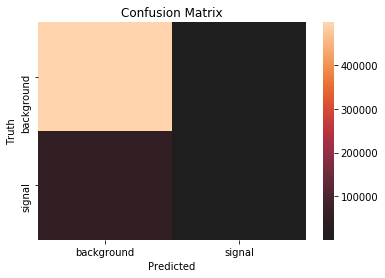


Check ground truth against predictions for the test sample
Truth	Prediction	Correct Prediction

Run Cross Validation On the Sample
cross validation scores =  [0.90595463 0.90599098 0.9061364  0.90595463 0.90570016]
	mean = 0.9059


In [16]:
print("\n\033[1mStudy the test data\033[0m")

predictions = BDT_clf.predict(test_x)
BDTcm = confusion_matrix(test_y, predictions)
print("\nconfusion matrix (test) = \n", BDTcm)

ax= plt.subplot()
sns.heatmap(BDTcm, center=True, ax = ax)
ax.set_xlabel('Predicted');ax.set_ylabel('Truth'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['background', 'signal']); ax.yaxis.set_ticklabels(['background', 'signal']);
plt.show()

print("\n\033[1mCheck ground truth against predictions for the test sample\033[0m")
print("Truth\tPrediction\tCorrect Prediction")
for i in range(len(predictions)):
    Match = False
    if predictions[i] == test_y[i]:
        Match = True

print("\n\033[1mRun Cross Validation On the Sample\033[0m")
scores = cross_val_score(BDT_clf, train_x, train_y, cv=5)
print("cross validation scores = ", scores)
print("\tmean = {:5.4f}".format(scores.mean()))

This is the best result so far for the signal, however a lot of data points were misclassifed. I think from this the best test_size will be between 0.4 - 0.6.

## n estimators

### n_estimators = 1000

In [20]:
train_bkg, test_bkg = train_test_split(background, test_size=0.4, random_state=2)
train_signal, test_signal = train_test_split(signal, test_size=0.4, random_state=2)

train_y = len(train_bkg) * [0] + len(train_signal) * [1]
test_y = len(test_bkg) * [0] + len(test_signal) * [1]

train_x = pd.concat([train_bkg, train_signal], ignore_index=True)
test_x = pd.concat([test_bkg, test_signal], ignore_index=True)

train_x.drop(["weight"], axis=1, inplace=True)
test_x.drop(["weight"], axis=1, inplace=True)


BDT_clf = AdaBoostClassifier(n_estimators=1000).fit(train_x, train_y)
train_score = BDT_clf.score(train_x, train_y)
test_score  = BDT_clf.score(test_x, test_y)

print("Decision Tree Classifier Score is:")
print("\tTrain Score = ", train_score)
print("\tTest Score  = {:5.4f}".format(test_score))
print("\tNumber of mis-classified test data = {:2.1f}".format((1-test_score)*len(test_x)))

Decision Tree Classifier Score is:
	Train Score =  0.9062265220952833
	Test Score  = 0.9061
	Number of mis-classified test data = 25831.0



Study the test data

confusion matrix (test) = 
 [[248954    226]
 [ 25605    297]]


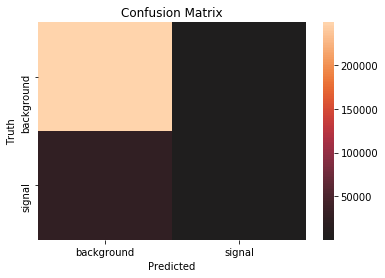


Check ground truth against predictions for the test sample
Truth	Prediction	Correct Prediction

Run Cross Validation On the Sample
cross validation scores =  [0.90605271 0.90584671 0.90590616 0.90596675 0.90610004]
	mean = 0.9060


In [21]:
print("\n\033[1mStudy the test data\033[0m")

predictions = BDT_clf.predict(test_x)
BDTcm = confusion_matrix(test_y, predictions)
print("\nconfusion matrix (test) = \n", BDTcm)

ax= plt.subplot()
sns.heatmap(BDTcm, center=True, ax = ax)
ax.set_xlabel('Predicted');ax.set_ylabel('Truth'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['background', 'signal']); ax.yaxis.set_ticklabels(['background', 'signal']);
plt.show()

print("\n\033[1mCheck ground truth against predictions for the test sample\033[0m")
print("Truth\tPrediction\tCorrect Prediction")
for i in range(len(predictions)):
    Match = False
    if predictions[i] == test_y[i]:
        Match = True

print("\n\033[1mRun Cross Validation On the Sample\033[0m")
scores = cross_val_score(BDT_clf, train_x, train_y, cv=5)
print("cross validation scores = ", scores)
print("\tmean = {:5.4f}".format(scores.mean()))

This took hours to run and the signal classification wasn't even that good, so I don't think it's worth having a large number of estimators - I think it will be better to increase the learning rate.

## learning rate

### learning_rate = 10

In [4]:
train_bkg, test_bkg = train_test_split(background, test_size=0.4, random_state=2)
train_signal, test_signal = train_test_split(signal, test_size=0.4, random_state=2)

train_y = len(train_bkg) * [0] + len(train_signal) * [1]
test_y = len(test_bkg) * [0] + len(test_signal) * [1]

train_x = pd.concat([train_bkg, train_signal], ignore_index=True)
test_x = pd.concat([test_bkg, test_signal], ignore_index=True)

train_x.drop(["weight"], axis=1, inplace=True)
test_x.drop(["weight"], axis=1, inplace=True)


BDT_clf = AdaBoostClassifier(n_estimators=100, learning_rate = 10).fit(train_x, train_y)
train_score = BDT_clf.score(train_x, train_y)
test_score  = BDT_clf.score(test_x, test_y)

print("Decision Tree Classifier Score is:")
print("\tTrain Score = ", train_score)
print("\tTest Score  = {:5.4f}".format(test_score))
print("\tNumber of mis-classified test data = {:2.1f}".format((1-test_score)*len(test_x)))

Decision Tree Classifier Score is:
	Train Score =  0.094158818482776
	Test Score  = 0.0942
	Number of mis-classified test data = 249180.0



Study the test data

confusion matrix (test) = 
 [[     0 249180]
 [     0  25902]]


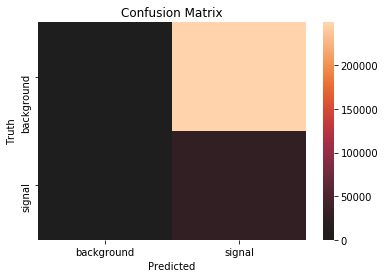


Check ground truth against predictions for the test sample
Truth	Prediction	Correct Prediction

Run Cross Validation On the Sample
cross validation scores =  [0.0941654  0.0941654  0.09415443 0.09415443 0.09415443]
	mean = 0.0942


In [5]:
print("\n\033[1mStudy the test data\033[0m")

predictions = BDT_clf.predict(test_x)
BDTcm = confusion_matrix(test_y, predictions)
print("\nconfusion matrix (test) = \n", BDTcm)

ax= plt.subplot()
sns.heatmap(BDTcm, center=True, ax = ax)
ax.set_xlabel('Predicted');ax.set_ylabel('Truth'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['background', 'signal']); ax.yaxis.set_ticklabels(['background', 'signal']);
plt.show()

print("\n\033[1mCheck ground truth against predictions for the test sample\033[0m")
print("Truth\tPrediction\tCorrect Prediction")
for i in range(len(predictions)):
    Match = False
    if predictions[i] == test_y[i]:
        Match = True

print("\n\033[1mRun Cross Validation On the Sample\033[0m")
scores = cross_val_score(BDT_clf, train_x, train_y, cv=5)
print("cross validation scores = ", scores)
print("\tmean = {:5.4f}".format(scores.mean()))

This is probably the worst result so far - the number of n_estimators needs to increase and the learning_rate needs to decrease. 

## test_size = 0.4, n_estimators = 500, learning_rate = 5

In [8]:
train_bkg, test_bkg = train_test_split(background, test_size=0.4, random_state=2)
train_signal, test_signal = train_test_split(signal, test_size=0.4, random_state=2)

train_y = len(train_bkg) * [0] + len(train_signal) * [1]
test_y = len(test_bkg) * [0] + len(test_signal) * [1]

train_x = pd.concat([train_bkg, train_signal], ignore_index=True)
test_x = pd.concat([test_bkg, test_signal], ignore_index=True)

train_x.drop(["weight"], axis=1, inplace=True)
test_x.drop(["weight"], axis=1, inplace=True)


BDT_clf = AdaBoostClassifier(n_estimators=500, learning_rate = 5).fit(train_x, train_y)
train_score = BDT_clf.score(train_x, train_y)
test_score  = BDT_clf.score(test_x, test_y)

print("Decision Tree Classifier Score is:")
print("\tTrain Score = ", train_score)
print("\tTest Score  = {:5.4f}".format(test_score))
print("\tNumber of mis-classified test data = {:2.1f}".format((1-test_score)*len(test_x)))

Decision Tree Classifier Score is:
	Train Score =  0.09887015234282225
	Test Score  = 0.0990
	Number of mis-classified test data = 247846.0



Study the test data

confusion matrix (test) = 
 [[  1335 247845]
 [     1  25901]]


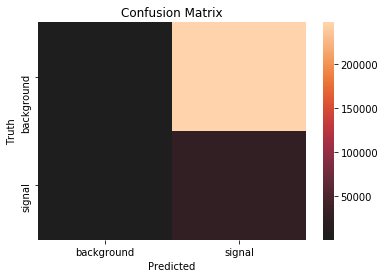


Check ground truth against predictions for the test sample
Truth	Prediction	Correct Prediction

Run Cross Validation On the Sample
cross validation scores =  [0.09897607 0.09898819 0.10012845 0.09875915 0.09891668]
	mean = 0.0992


In [9]:
print("\n\033[1mStudy the test data\033[0m")

predictions = BDT_clf.predict(test_x)
BDTcm = confusion_matrix(test_y, predictions)
print("\nconfusion matrix (test) = \n", BDTcm)

ax= plt.subplot()
sns.heatmap(BDTcm, center=True, ax = ax)
ax.set_xlabel('Predicted');ax.set_ylabel('Truth'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['background', 'signal']); ax.yaxis.set_ticklabels(['background', 'signal']);
plt.show()

print("\n\033[1mCheck ground truth against predictions for the test sample\033[0m")
print("Truth\tPrediction\tCorrect Prediction")
for i in range(len(predictions)):
    Match = False
    if predictions[i] == test_y[i]:
        Match = True

print("\n\033[1mRun Cross Validation On the Sample\033[0m")
scores = cross_val_score(BDT_clf, train_x, train_y, cv=5)
print("cross validation scores = ", scores)
print("\tmean = {:5.4f}".format(scores.mean()))

## test_size = 0.4, n_estimators = 500, learning_rate = 3

In [13]:
train_bkg, test_bkg = train_test_split(background, test_size=0.4, random_state=2)
train_signal, test_signal = train_test_split(signal, test_size=0.4, random_state=2)

train_y = len(train_bkg) * [0] + len(train_signal) * [1]
test_y = len(test_bkg) * [0] + len(test_signal) * [1]

train_x = pd.concat([train_bkg, train_signal], ignore_index=True)
test_x = pd.concat([test_bkg, test_signal], ignore_index=True)

train_x.drop(["weight"], axis=1, inplace=True)
test_x.drop(["weight"], axis=1, inplace=True)


BDT_clf = AdaBoostClassifier(n_estimators=500, learning_rate = 3).fit(train_x, train_y)
train_score = BDT_clf.score(train_x, train_y)
test_score  = BDT_clf.score(test_x, test_y)

print("Decision Tree Classifier Score is:")
print("\tTrain Score = ", train_score)
print("\tTest Score  = {:5.4f}".format(test_score))
print("\tNumber of mis-classified test data = {:2.1f}".format((1-test_score)*len(test_x)))

Decision Tree Classifier Score is:
	Train Score =  0.09887015234282225
	Test Score  = 0.0990
	Number of mis-classified test data = 247846.0



Study the test data

confusion matrix (test) = 
 [[  1335 247845]
 [     1  25901]]


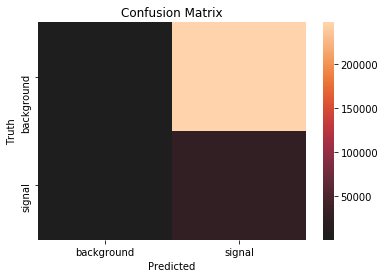


Check ground truth against predictions for the test sample
Truth	Prediction	Correct Prediction

Run Cross Validation On the Sample
cross validation scores =  [0.09897607 0.09898819 0.10012845 0.09415443 0.09891668]
	mean = 0.0982


In [14]:
print("\n\033[1mStudy the test data\033[0m")

predictions = BDT_clf.predict(test_x)
BDTcm = confusion_matrix(test_y, predictions)
print("\nconfusion matrix (test) = \n", BDTcm)

ax= plt.subplot()
sns.heatmap(BDTcm, center=True, ax = ax)
ax.set_xlabel('Predicted');ax.set_ylabel('Truth'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['background', 'signal']); ax.yaxis.set_ticklabels(['background', 'signal']);
plt.show()

print("\n\033[1mCheck ground truth against predictions for the test sample\033[0m")
print("Truth\tPrediction\tCorrect Prediction")
for i in range(len(predictions)):
    Match = False
    if predictions[i] == test_y[i]:
        Match = True

print("\n\033[1mRun Cross Validation On the Sample\033[0m")
scores = cross_val_score(BDT_clf, train_x, train_y, cv=5)
print("cross validation scores = ", scores)
print("\tmean = {:5.4f}".format(scores.mean()))

Changing the learning rate from 5 to 3 did not change the results.

## test_size = 0.4, n_estimators = 300, learning_rate = 2

In [2]:
train_bkg, test_bkg = train_test_split(background, test_size=0.4, random_state=2)
train_signal, test_signal = train_test_split(signal, test_size=0.4, random_state=2)

train_y = len(train_bkg) * [0] + len(train_signal) * [1]
test_y = len(test_bkg) * [0] + len(test_signal) * [1]

train_x = pd.concat([train_bkg, train_signal], ignore_index=True)
test_x = pd.concat([test_bkg, test_signal], ignore_index=True)

train_x.drop(["weight"], axis=1, inplace=True)
test_x.drop(["weight"], axis=1, inplace=True)


BDT_clf = AdaBoostClassifier(n_estimators=300, learning_rate = 2).fit(train_x, train_y)
train_score = BDT_clf.score(train_x, train_y)
test_score  = BDT_clf.score(test_x, test_y)

print("Decision Tree Classifier Score is:")
print("\tTrain Score = ", train_score)
print("\tTest Score  = {:5.4f}".format(test_score))
print("\tNumber of mis-classified test data = {:2.1f}".format((1-test_score)*len(test_x)))

Decision Tree Classifier Score is:
	Train Score =  0.6220560222188831
	Test Score  = 0.6223
	Number of mis-classified test data = 103900.0



Study the test data

confusion matrix (test) = 
 [[154480  94700]
 [  9200  16702]]


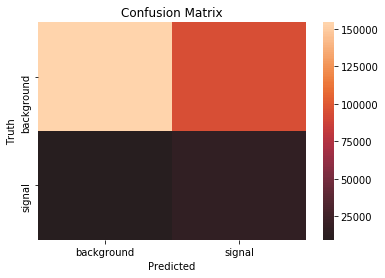


Check ground truth against predictions for the test sample
Truth	Prediction	Correct Prediction

Run Cross Validation On the Sample
cross validation scores =  [0.6170615  0.61269918 0.61772333 0.59902574 0.61822015]
	mean = 0.6129


In [3]:
print("\n\033[1mStudy the test data\033[0m")

predictions = BDT_clf.predict(test_x)
BDTcm = confusion_matrix(test_y, predictions)
print("\nconfusion matrix (test) = \n", BDTcm)

ax= plt.subplot()
sns.heatmap(BDTcm, center=True, ax = ax)
ax.set_xlabel('Predicted');ax.set_ylabel('Truth'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['background', 'signal']); ax.yaxis.set_ticklabels(['background', 'signal']);
plt.show()

print("\n\033[1mCheck ground truth against predictions for the test sample\033[0m")
print("Truth\tPrediction\tCorrect Prediction")
for i in range(len(predictions)):
    Match = False
    if predictions[i] == test_y[i]:
        Match = True

print("\n\033[1mRun Cross Validation On the Sample\033[0m")
scores = cross_val_score(BDT_clf, train_x, train_y, cv=5)
print("cross validation scores = ", scores)
print("\tmean = {:5.4f}".format(scores.mean()))

This is the best results so far, therefore I think we need to keep the learning rate between 2 and 3 and try increasing n_estimators.

## test_size = 0.4, n_estimators = 500, learning_rate = 2

In [5]:
train_bkg, test_bkg = train_test_split(background, test_size=0.4, random_state=2)
train_signal, test_signal = train_test_split(signal, test_size=0.4, random_state=2)

train_y = len(train_bkg) * [0] + len(train_signal) * [1]
test_y = len(test_bkg) * [0] + len(test_signal) * [1]

train_x = pd.concat([train_bkg, train_signal], ignore_index=True)
test_x = pd.concat([test_bkg, test_signal], ignore_index=True)

train_x.drop(["weight"], axis=1, inplace=True)
test_x.drop(["weight"], axis=1, inplace=True)


BDT_clf = AdaBoostClassifier(n_estimators=500, learning_rate = 2).fit(train_x, train_y)
train_score = BDT_clf.score(train_x, train_y)
test_score  = BDT_clf.score(test_x, test_y)

print("Decision Tree Classifier Score is:")
print("\tTrain Score = ", train_score)
print("\tTest Score  = {:5.4f}".format(test_score))
print("\tNumber of mis-classified test data = {:2.1f}".format((1-test_score)*len(test_x)))

Decision Tree Classifier Score is:
	Train Score =  0.6151538211728895
	Test Score  = 0.6145
	Number of mis-classified test data = 106055.0



Study the test data

confusion matrix (test) = 
 [[152074  97106]
 [  8949  16953]]


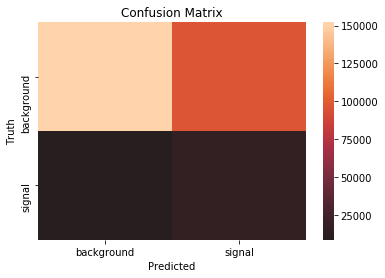

In [6]:
print("\n\033[1mStudy the test data\033[0m")

predictions = BDT_clf.predict(test_x)
BDTcm = confusion_matrix(test_y, predictions)
print("\nconfusion matrix (test) = \n", BDTcm)

ax= plt.subplot()
sns.heatmap(BDTcm, center=True, ax = ax)
ax.set_xlabel('Predicted');ax.set_ylabel('Truth'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['background', 'signal']); ax.yaxis.set_ticklabels(['background', 'signal']);
plt.show()

#print("\n\033[1mCheck ground truth against predictions for the test sample\033[0m")
#print("Truth\tPrediction\tCorrect Prediction")
#for i in range(len(predictions)):
#    Match = False
#    if predictions[i] == test_y[i]:
 #       Match = True

#print("\n\033[1mRun Cross Validation On the Sample\033[0m")
#scores = cross_val_score(BDT_clf, train_x, train_y, cv=5)
#print("cross validation scores = ", scores)
#print("\tmean = {:5.4f}".format(scores.mean()))

This is similar to n_estimators = 300 so I'm now going to change the test_size to 0.6

## test_size = 0.6, n_estimators = 500, learning_rate = 2

In [7]:
train_bkg, test_bkg = train_test_split(background, test_size=0.6, random_state=2)
train_signal, test_signal = train_test_split(signal, test_size=0.6, random_state=2)

train_y = len(train_bkg) * [0] + len(train_signal) * [1]
test_y = len(test_bkg) * [0] + len(test_signal) * [1]

train_x = pd.concat([train_bkg, train_signal], ignore_index=True)
test_x = pd.concat([test_bkg, test_signal], ignore_index=True)

train_x.drop(["weight"], axis=1, inplace=True)
test_x.drop(["weight"], axis=1, inplace=True)


BDT_clf = AdaBoostClassifier(n_estimators=500, learning_rate = 2).fit(train_x, train_y)
train_score = BDT_clf.score(train_x, train_y)
test_score  = BDT_clf.score(test_x, test_y)

print("Decision Tree Classifier Score is:")
print("\tTrain Score = ", train_score)
print("\tTest Score  = {:5.4f}".format(test_score))
print("\tNumber of mis-classified test data = {:2.1f}".format((1-test_score)*len(test_x)))

Decision Tree Classifier Score is:
	Train Score =  0.6126958968449293
	Test Score  = 0.6085
	Number of mis-classified test data = 161539.0



Study the test data

confusion matrix (test) = 
 [[225402 148368]
 [ 13171  25682]]


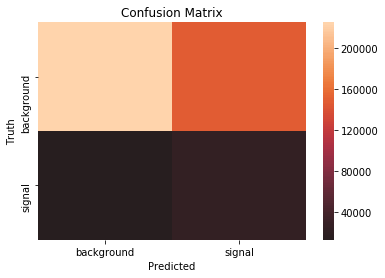

In [8]:
print("\n\033[1mStudy the test data\033[0m")

predictions = BDT_clf.predict(test_x)
BDTcm = confusion_matrix(test_y, predictions)
print("\nconfusion matrix (test) = \n", BDTcm)

ax= plt.subplot()
sns.heatmap(BDTcm, center=True, ax = ax)
ax.set_xlabel('Predicted');ax.set_ylabel('Truth'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['background', 'signal']); ax.yaxis.set_ticklabels(['background', 'signal']);
plt.show()

## Using the DecissionTreeClassifer class

### Testing max depth 

### max_depth = 1

In [15]:
train_bkg, test_bkg = train_test_split(background, test_size=0.4, random_state=2)
train_signal, test_signal = train_test_split(signal, test_size=0.4, random_state=2)

train_y = len(train_bkg) * [0] + len(train_signal) * [1]
test_y = len(test_bkg) * [0] + len(test_signal) * [1]

train_x = pd.concat([train_bkg, train_signal], ignore_index=True)
test_x = pd.concat([test_bkg, test_signal], ignore_index=True)

train_x.drop(["weight"], axis=1, inplace=True)
test_x.drop(["weight"], axis=1, inplace=True)

print("Data has been split into test and train samples")
print("\tN(train) = ", len(train_x))
print("\tN(test)  = ", len(test_x))

Data has been split into test and train samples
	N(train) =  412622
	N(test)  =  275082


In [16]:
from sklearn.tree import DecisionTreeClassifier

print("\033[1mFit the decision tree\033[0m")
#BDT_clf = AdaBoostClassifier(n_estimators=100).fit(train_x, train_y)
BDT_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=100).fit(train_x, train_y)

print("... now compute the decision tree score")
train_score = BDT_clf.score(train_x, train_y)
test_score  = BDT_clf.score(test_x, test_y)

print("\nDecision Tree Classifier Score is:")
print("\tTrain Score = ", train_score, " (This measure of performance is biased)")
print("\tTest Score  = {:5.4f}".format(test_score))
print("\tNumber of mis-classified test data = {:2.1f}".format((1-test_score)*len(test_x)))

Fit the decision tree
... now compute the decision tree score

Decision Tree Classifier Score is:
	Train Score =  0.905841181517224  (This measure of performance is biased)
	Test Score  = 0.9058
	Number of mis-classified test data = 25902.0



Study the test data

confusion matrix (test) = 
 [[249180      0]
 [ 25902      0]]


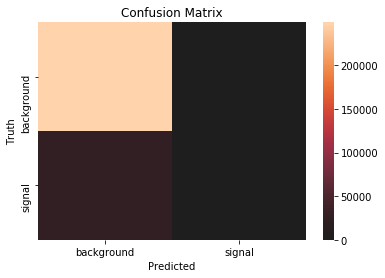


Check ground truth against predictions for the test sample
Truth	Prediction	Correct Prediction

Run Cross Validation On the Sample
cross validation scores =  [0.9058346  0.9058346  0.90584557 0.90584557 0.90584557]
	mean = 0.9058


In [17]:
print("\n\033[1mStudy the test data\033[0m")

predictions = BDT_clf.predict(test_x)
BDTcm = confusion_matrix(test_y, predictions)
print("\nconfusion matrix (test) = \n", BDTcm)

ax= plt.subplot()
sns.heatmap(BDTcm, center=True, ax = ax)
ax.set_xlabel('Predicted');ax.set_ylabel('Truth'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['background', 'signal']); ax.yaxis.set_ticklabels(['background', 'signal']);
plt.show()

print("\n\033[1mCheck ground truth against predictions for the test sample\033[0m")
print("Truth\tPrediction\tCorrect Prediction")
for i in range(len(predictions)):
    Match = False
    if predictions[i] == test_y[i]:
        Match = True

print("\n\033[1mRun Cross Validation On the Sample\033[0m")
scores = cross_val_score(BDT_clf, train_x, train_y, cv=5)
print("cross validation scores = ", scores)
print("\tmean = {:5.4f}".format(scores.mean()))

### max_depth = 2

In [10]:
train_bkg, test_bkg = train_test_split(background, test_size=0.4, random_state=2)
train_signal, test_signal = train_test_split(signal, test_size=0.4, random_state=2)

train_y = len(train_bkg) * [0] + len(train_signal) * [1]
test_y = len(test_bkg) * [0] + len(test_signal) * [1]

train_x = pd.concat([train_bkg, train_signal], ignore_index=True)
test_x = pd.concat([test_bkg, test_signal], ignore_index=True)

train_x.drop(["weight"], axis=1, inplace=True)
test_x.drop(["weight"], axis=1, inplace=True)

print("Data has been split into test and train samples")
print("\tN(train) = ", len(train_x))
print("\tN(test)  = ", len(test_x))

Data has been split into test and train samples
	N(train) =  412622
	N(test)  =  275082


In [11]:
from sklearn.tree import DecisionTreeClassifier

print("\033[1mFit the decision tree\033[0m")
#BDT_clf = AdaBoostClassifier(n_estimators=100).fit(train_x, train_y)
BDT_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), algorithm="SAMME", n_estimators=100).fit(train_x, train_y)

print("... now compute the decision tree score")
train_score = BDT_clf.score(train_x, train_y)
test_score  = BDT_clf.score(test_x, test_y)

print("\nDecision Tree Classifier Score is:")
print("\tTrain Score = ", train_score, " (This measure of performance is biased)")
print("\tTest Score  = {:5.4f}".format(test_score))
print("\tNumber of mis-classified test data = {:2.1f}".format((1-test_score)*len(test_x)))

Fit the decision tree
... now compute the decision tree score

Decision Tree Classifier Score is:
	Train Score =  0.9059381225431509  (This measure of performance is biased)
	Test Score  = 0.9059
	Number of mis-classified test data = 25894.0



Study the test data

confusion matrix (test) = 
 [[249029    151]
 [ 25743    159]]


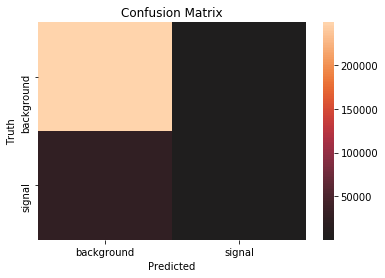


Check ground truth against predictions for the test sample
Truth	Prediction	Correct Prediction

Run Cross Validation On the Sample
cross validation scores =  [0.90621024 0.90588307 0.90571228 0.90584557 0.90586981]
	mean = 0.9059


In [12]:
print("\n\033[1mStudy the test data\033[0m")

predictions = BDT_clf.predict(test_x)
BDTcm = confusion_matrix(test_y, predictions)
print("\nconfusion matrix (test) = \n", BDTcm)

ax= plt.subplot()
sns.heatmap(BDTcm, center=True, ax = ax)
ax.set_xlabel('Predicted');ax.set_ylabel('Truth'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['background', 'signal']); ax.yaxis.set_ticklabels(['background', 'signal']);
plt.show()

print("\n\033[1mCheck ground truth against predictions for the test sample\033[0m")
print("Truth\tPrediction\tCorrect Prediction")
for i in range(len(predictions)):
    Match = False
    if predictions[i] == test_y[i]:
        Match = True

print("\n\033[1mRun Cross Validation On the Sample\033[0m")
scores = cross_val_score(BDT_clf, train_x, train_y, cv=5)
print("cross validation scores = ", scores)
print("\tmean = {:5.4f}".format(scores.mean()))

### max_depth = 5

In [18]:
from sklearn.tree import DecisionTreeClassifier

print("\033[1mFit the decision tree\033[0m")
#BDT_clf = AdaBoostClassifier(n_estimators=100).fit(train_x, train_y)
BDT_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), algorithm="SAMME", n_estimators=100).fit(train_x, train_y)

print("... now compute the decision tree score")
train_score = BDT_clf.score(train_x, train_y)
test_score  = BDT_clf.score(test_x, test_y)

print("\nDecision Tree Classifier Score is:")
print("\tTrain Score = ", train_score, " (This measure of performance is biased)")
print("\tTest Score  = {:5.4f}".format(test_score))
print("\tNumber of mis-classified test data = {:2.1f}".format((1-test_score)*len(test_x)))

Fit the decision tree
... now compute the decision tree score

Decision Tree Classifier Score is:
	Train Score =  0.9060762635050966  (This measure of performance is biased)
	Test Score  = 0.9056
	Number of mis-classified test data = 25968.0



Study the test data

confusion matrix (test) = 
 [[247901   1279]
 [ 24689   1213]]


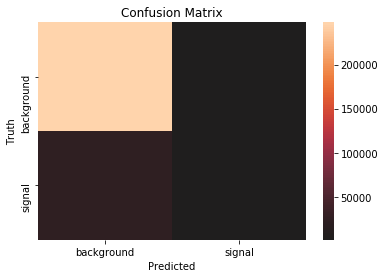


Check ground truth against predictions for the test sample
Truth	Prediction	Correct Prediction

Run Cross Validation On the Sample
cross validation scores =  [0.9059073  0.9054226  0.90586981 0.9057971  0.90548204]
	mean = 0.9057


In [19]:
print("\n\033[1mStudy the test data\033[0m")

predictions = BDT_clf.predict(test_x)
BDTcm = confusion_matrix(test_y, predictions)
print("\nconfusion matrix (test) = \n", BDTcm)

ax= plt.subplot()
sns.heatmap(BDTcm, center=True, ax = ax)
ax.set_xlabel('Predicted');ax.set_ylabel('Truth'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['background', 'signal']); ax.yaxis.set_ticklabels(['background', 'signal']);
plt.show()

print("\n\033[1mCheck ground truth against predictions for the test sample\033[0m")
print("Truth\tPrediction\tCorrect Prediction")
for i in range(len(predictions)):
    Match = False
    if predictions[i] == test_y[i]:
        Match = True

print("\n\033[1mRun Cross Validation On the Sample\033[0m")
scores = cross_val_score(BDT_clf, train_x, train_y, cv=5)
print("cross validation scores = ", scores)
print("\tmean = {:5.4f}".format(scores.mean()))

### Trying different n_estimators 

### max_depth = 2, test_size = 0.4, n_estimators = 300, learning rate = 1

In [9]:
train_bkg, test_bkg = train_test_split(background, test_size=0.4, random_state=2)
train_signal, test_signal = train_test_split(signal, test_size=0.4, random_state=2)

train_y = len(train_bkg) * [0] + len(train_signal) * [1]
test_y = len(test_bkg) * [0] + len(test_signal) * [1]

train_x = pd.concat([train_bkg, train_signal], ignore_index=True)
test_x = pd.concat([test_bkg, test_signal], ignore_index=True)

train_x.drop(["weight"], axis=1, inplace=True)
test_x.drop(["weight"], axis=1, inplace=True)

print("Data has been split into test and train samples")
print("\tN(train) = ", len(train_x))
print("\tN(test)  = ", len(test_x))

Data has been split into test and train samples
	N(train) =  412622
	N(test)  =  275082


In [10]:
from sklearn.tree import DecisionTreeClassifier

print("\033[1mFit the decision tree\033[0m")
BDT_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), algorithm="SAMME", n_estimators=300).fit(train_x, train_y)

print("... now compute the decision tree score")
train_score = BDT_clf.score(train_x, train_y)
test_score  = BDT_clf.score(test_x, test_y)

print("\nDecision Tree Classifier Score is:")
print("\tTrain Score = ", train_score, " (This measure of performance is biased)")
print("\tTest Score  = {:5.4f}".format(test_score))
print("\tNumber of mis-classified test data = {:2.1f}".format((1-test_score)*len(test_x)))

Fit the decision tree
... now compute the decision tree score

Decision Tree Classifier Score is:
	Train Score =  0.9061683574797272  (This measure of performance is biased)
	Test Score  = 0.9063
	Number of mis-classified test data = 25769.0



Study the test data

confusion matrix (test) = 
 [[248801    379]
 [ 25390    512]]


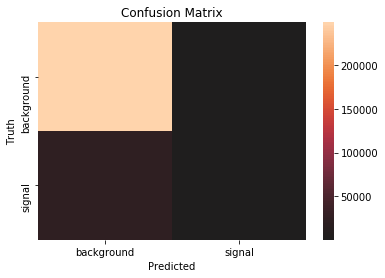

In [11]:
print("\n\033[1mStudy the test data\033[0m")

predictions = BDT_clf.predict(test_x)
BDTcm = confusion_matrix(test_y, predictions)
print("\nconfusion matrix (test) = \n", BDTcm)

ax= plt.subplot()
sns.heatmap(BDTcm, center=True, ax = ax)
ax.set_xlabel('Predicted');ax.set_ylabel('Truth'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['background', 'signal']); ax.yaxis.set_ticklabels(['background', 'signal']);
plt.show()

### max_depth = 2, test_size = 0.4, n_estimators = 500, learning rate = 1

In [12]:
train_bkg, test_bkg = train_test_split(background, test_size=0.4, random_state=2)
train_signal, test_signal = train_test_split(signal, test_size=0.4, random_state=2)

train_y = len(train_bkg) * [0] + len(train_signal) * [1]
test_y = len(test_bkg) * [0] + len(test_signal) * [1]

train_x = pd.concat([train_bkg, train_signal], ignore_index=True)
test_x = pd.concat([test_bkg, test_signal], ignore_index=True)

train_x.drop(["weight"], axis=1, inplace=True)
test_x.drop(["weight"], axis=1, inplace=True)

print("Data has been split into test and train samples")
print("\tN(train) = ", len(train_x))
print("\tN(test)  = ", len(test_x))

Data has been split into test and train samples
	N(train) =  412622
	N(test)  =  275082


In [13]:
from sklearn.tree import DecisionTreeClassifier

print("\033[1mFit the decision tree\033[0m")
BDT_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), algorithm="SAMME", n_estimators=500).fit(train_x, train_y)

print("... now compute the decision tree score")
train_score = BDT_clf.score(train_x, train_y)
test_score  = BDT_clf.score(test_x, test_y)

print("\nDecision Tree Classifier Score is:")
print("\tTrain Score = ", train_score, " (This measure of performance is biased)")
print("\tTest Score  = {:5.4f}".format(test_score))
print("\tNumber of mis-classified test data = {:2.1f}".format((1-test_score)*len(test_x)))

Fit the decision tree
... now compute the decision tree score

Decision Tree Classifier Score is:
	Train Score =  0.9061489692745418  (This measure of performance is biased)
	Test Score  = 0.9063
	Number of mis-classified test data = 25773.0



Study the test data

confusion matrix (test) = 
 [[248921    259]
 [ 25514    388]]


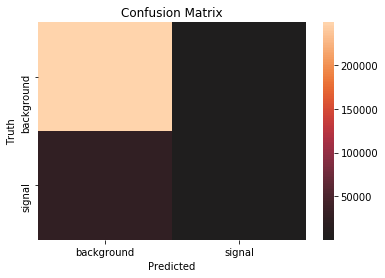

In [14]:
print("\n\033[1mStudy the test data\033[0m")

predictions = BDT_clf.predict(test_x)
BDTcm = confusion_matrix(test_y, predictions)
print("\nconfusion matrix (test) = \n", BDTcm)

ax= plt.subplot()
sns.heatmap(BDTcm, center=True, ax = ax)
ax.set_xlabel('Predicted');ax.set_ylabel('Truth'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['background', 'signal']); ax.yaxis.set_ticklabels(['background', 'signal']);
plt.show()

### max_depth = 2, test_size = 0.4, n_estimators = 200, learning rate = 1

In [15]:
train_bkg, test_bkg = train_test_split(background, test_size=0.4, random_state=2)
train_signal, test_signal = train_test_split(signal, test_size=0.4, random_state=2)

train_y = len(train_bkg) * [0] + len(train_signal) * [1]
test_y = len(test_bkg) * [0] + len(test_signal) * [1]

train_x = pd.concat([train_bkg, train_signal], ignore_index=True)
test_x = pd.concat([test_bkg, test_signal], ignore_index=True)

train_x.drop(["weight"], axis=1, inplace=True)
test_x.drop(["weight"], axis=1, inplace=True)

print("Data has been split into test and train samples")
print("\tN(train) = ", len(train_x))
print("\tN(test)  = ", len(test_x))

Data has been split into test and train samples
	N(train) =  412622
	N(test)  =  275082


In [16]:
from sklearn.tree import DecisionTreeClassifier

print("\033[1mFit the decision tree\033[0m")
BDT_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), algorithm="SAMME", n_estimators=200).fit(train_x, train_y)

print("... now compute the decision tree score")
train_score = BDT_clf.score(train_x, train_y)
test_score  = BDT_clf.score(test_x, test_y)

print("\nDecision Tree Classifier Score is:")
print("\tTrain Score = ", train_score, " (This measure of performance is biased)")
print("\tTest Score  = {:5.4f}".format(test_score))
print("\tNumber of mis-classified test data = {:2.1f}".format((1-test_score)*len(test_x)))

Fit the decision tree
... now compute the decision tree score

Decision Tree Classifier Score is:
	Train Score =  0.9060762635050966  (This measure of performance is biased)
	Test Score  = 0.9061
	Number of mis-classified test data = 25818.0



Study the test data

confusion matrix (test) = 
 [[248955    225]
 [ 25593    309]]


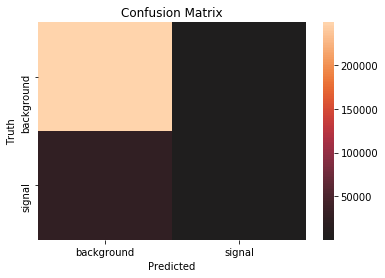

In [17]:
print("\n\033[1mStudy the test data\033[0m")

predictions = BDT_clf.predict(test_x)
BDTcm = confusion_matrix(test_y, predictions)
print("\nconfusion matrix (test) = \n", BDTcm)

ax= plt.subplot()
sns.heatmap(BDTcm, center=True, ax = ax)
ax.set_xlabel('Predicted');ax.set_ylabel('Truth'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['background', 'signal']); ax.yaxis.set_ticklabels(['background', 'signal']);
plt.show()

### max_depth = 5, test_size = 0.4, n_estimators = 300, learning rate = 1

In [18]:
train_bkg, test_bkg = train_test_split(background, test_size=0.4, random_state=2)
train_signal, test_signal = train_test_split(signal, test_size=0.4, random_state=2)

train_y = len(train_bkg) * [0] + len(train_signal) * [1]
test_y = len(test_bkg) * [0] + len(test_signal) * [1]

train_x = pd.concat([train_bkg, train_signal], ignore_index=True)
test_x = pd.concat([test_bkg, test_signal], ignore_index=True)

train_x.drop(["weight"], axis=1, inplace=True)
test_x.drop(["weight"], axis=1, inplace=True)

print("Data has been split into test and train samples")
print("\tN(train) = ", len(train_x))
print("\tN(test)  = ", len(test_x))

Data has been split into test and train samples
	N(train) =  412622
	N(test)  =  275082


In [ ]:
from sklearn.tree import DecisionTreeClassifier

print("\033[1mFit the decision tree\033[0m")
BDT_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), algorithm="SAMME", n_estimators=300).fit(train_x, train_y)

print("... now compute the decision tree score")
train_score = BDT_clf.score(train_x, train_y)
test_score  = BDT_clf.score(test_x, test_y)

print("\nDecision Tree Classifier Score is:")
print("\tTrain Score = ", train_score, " (This measure of performance is biased)")
print("\tTest Score  = {:5.4f}".format(test_score))
print("\tNumber of mis-classified test data = {:2.1f}".format((1-test_score)*len(test_x)))

Fit the decision tree


In [ ]:
print("\n\033[1mStudy the test data\033[0m")

predictions = BDT_clf.predict(test_x)
BDTcm = confusion_matrix(test_y, predictions)
print("\nconfusion matrix (test) = \n", BDTcm)

ax= plt.subplot()
sns.heatmap(BDTcm, center=True, ax = ax)
ax.set_xlabel('Predicted');ax.set_ylabel('Truth'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['background', 'signal']); ax.yaxis.set_ticklabels(['background', 'signal']);
plt.show()